In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [54]:
def process(d, N, coeff):
    zero_one_interval = [np.random.random()*2 - 1 for _ in range(d)]
    for i in range(d*(N-1)):
        new_value = zero_one_interval[i]*coeff + np.random.normal(0, 0.2)
        zero_one_interval.append(new_value)
    return zero_one_interval

In [55]:
def plot_process(a, b, coeff):
    ar_1_process = process(a,b, coeff)
    interval = [i/a for i in range(a*b)]
    plt.figure(figsize=(10,4))
    plt.plot(interval, ar_1_process)
    plt.axhline(y=0, xmin=0, xmax=1, linestyle='--', color='k')
    plt.title('Stationary AR(1) Process', fontsize=18)

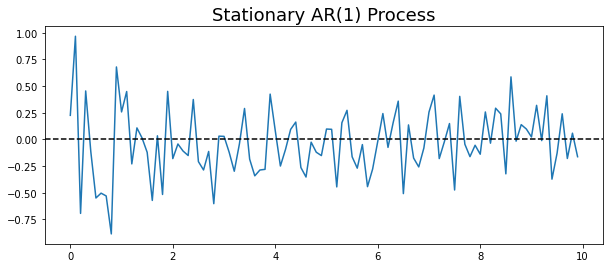

In [56]:
plot_process(10,10,0.5)

# Let's plot $Y_{t}$ as a function of $Y_{t-1}$

In [79]:
a     = 10
b     = 100
coeff = 0.5
arr_process = process(a,b, coeff)
Y_t   = np.array(arr_process[a:])
Y_t_1 = np.array(arr_process[:-a])

Text(0, 0.5, '$Y_t$')

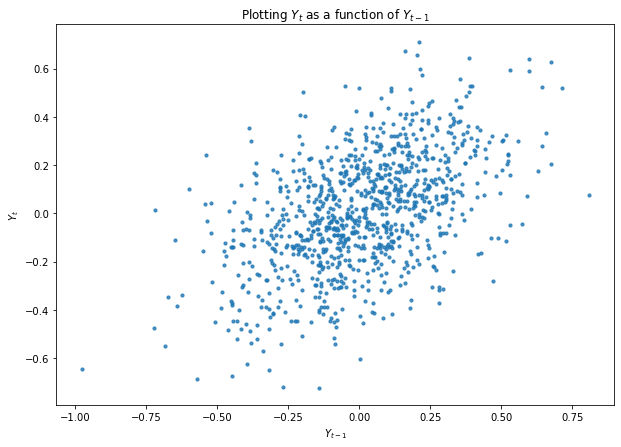

In [88]:
fig =plt.figure(figsize=(10, 7))
plt.scatter(Y_t_1,Y_t,cmap='YlGnBu', marker='o', s=10, alpha=0.8)
plt.title('Plotting $Y_t$ as a function of $Y_{t-1}$')
plt.xlabel('$Y_{t-1}$')
plt.ylabel('$Y_t$')

In [62]:
from sklearn.linear_model import LinearRegression